In [1]:
import config
import ast

import pandas as pd
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
import statistics

from utils.pandas_dataframe import grid_display
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from itertools import permutations
import gc

# validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from morfist import MixedRandomForest

# grid search
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import MultiTaskLassoCV
from sklearn.model_selection import GridSearchCV


from sklearn.multioutput import RegressorChain
from sklearn.multioutput import MultiOutputRegressor

from IPython.display import display


%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format',lambda x: '%.2f' % x)
# pd.set_option('display.max_rows', 5)
pd.set_option('display.max_rows', None)

In [3]:
data = pd.read_excel('../Data/2022-train-v2.xlsx')

In [4]:
data_y = data[['sensor_point5_i_value', 'sensor_point6_i_value',\
               'sensor_point7_i_value', 'sensor_point8_i_value',\
               'sensor_point9_i_value', 'sensor_point10_i_value']]
data_x = data.drop(['sensor_point5_i_value', 'sensor_point6_i_value',\
                    'sensor_point7_i_value', 'sensor_point8_i_value',\
                    'sensor_point9_i_value', 'sensor_point10_i_value'], axis=1)

In [5]:
data_x = data_x.fillna(0)

In [6]:
# X變數標準化
scaler = StandardScaler().fit(data_x)
data_x_S = scaler.transform(data_x)

In [8]:
config.grid_search_Cat.fit(data_x_S, data_y.loc[:,config.Y_variable])
config.grid_search_Cat.best_params_

0:	learn: 12.8061145	total: 161ms	remaining: 32.1s
1:	learn: 12.3946000	total: 166ms	remaining: 16.4s
2:	learn: 12.1479984	total: 170ms	remaining: 11.2s
3:	learn: 11.8777513	total: 173ms	remaining: 8.5s
4:	learn: 11.5619842	total: 177ms	remaining: 6.89s
5:	learn: 11.3853554	total: 180ms	remaining: 5.82s
6:	learn: 11.2049888	total: 183ms	remaining: 5.05s
7:	learn: 11.0560220	total: 186ms	remaining: 4.47s
8:	learn: 10.8937247	total: 189ms	remaining: 4.01s
9:	learn: 10.7472428	total: 191ms	remaining: 3.64s
10:	learn: 10.6179696	total: 194ms	remaining: 3.34s
11:	learn: 10.5118472	total: 198ms	remaining: 3.1s
12:	learn: 10.3876118	total: 201ms	remaining: 2.89s
13:	learn: 10.2947885	total: 203ms	remaining: 2.7s
14:	learn: 10.1883326	total: 207ms	remaining: 2.55s
15:	learn: 10.0919736	total: 211ms	remaining: 2.43s
16:	learn: 9.9561584	total: 214ms	remaining: 2.31s
17:	learn: 9.8659031	total: 217ms	remaining: 2.19s
18:	learn: 9.7667303	total: 220ms	remaining: 2.1s
19:	learn: 9.7043594	total: 2

181:	learn: 6.8423297	total: 653ms	remaining: 64.6ms
182:	learn: 6.8356386	total: 655ms	remaining: 60.8ms
183:	learn: 6.8235400	total: 657ms	remaining: 57.1ms
184:	learn: 6.8204577	total: 659ms	remaining: 53.4ms
185:	learn: 6.8134274	total: 661ms	remaining: 49.7ms
186:	learn: 6.8074129	total: 663ms	remaining: 46.1ms
187:	learn: 6.8021426	total: 665ms	remaining: 42.4ms
188:	learn: 6.7914415	total: 667ms	remaining: 38.8ms
189:	learn: 6.7888018	total: 669ms	remaining: 35.2ms
190:	learn: 6.7848850	total: 671ms	remaining: 31.6ms
191:	learn: 6.7767344	total: 672ms	remaining: 28ms
192:	learn: 6.7690671	total: 674ms	remaining: 24.5ms
193:	learn: 6.7646458	total: 676ms	remaining: 20.9ms
194:	learn: 6.7622525	total: 678ms	remaining: 17.4ms
195:	learn: 6.7563279	total: 680ms	remaining: 13.9ms
196:	learn: 6.7512953	total: 682ms	remaining: 10.4ms
197:	learn: 6.7457430	total: 684ms	remaining: 6.9ms
198:	learn: 6.7441220	total: 686ms	remaining: 3.44ms
199:	learn: 6.7354215	total: 687ms	remaining: 0us

{'depth': 2, 'iterations': 200, 'l2_leaf_reg': 0.5, 'learning_rate': 0.1}

In [11]:
model_select = Pipeline([('poly',PolynomialFeatures(degree = 2)),
                         ('std_scaler', StandardScaler()),
                         ('mod', config.model_info['Cat']['Model'])  # 修改model
                        ])

model_select.fit(data_x, data_y.loc[:,config.Y_variable])

y_predict = model_select.predict(data_x)
y_predict

0:	learn: 12.7631968	total: 103ms	remaining: 20.5s
1:	learn: 12.4223571	total: 175ms	remaining: 17.3s
2:	learn: 12.0414633	total: 250ms	remaining: 16.4s
3:	learn: 11.7217643	total: 328ms	remaining: 16.1s
4:	learn: 11.4082068	total: 415ms	remaining: 16.2s
5:	learn: 11.1397906	total: 489ms	remaining: 15.8s
6:	learn: 10.9503336	total: 567ms	remaining: 15.6s
7:	learn: 10.7633070	total: 642ms	remaining: 15.4s
8:	learn: 10.5836017	total: 720ms	remaining: 15.3s
9:	learn: 10.3860059	total: 793ms	remaining: 15.1s
10:	learn: 10.2310850	total: 886ms	remaining: 15.2s
11:	learn: 10.1061482	total: 981ms	remaining: 15.4s
12:	learn: 9.9963212	total: 1.08s	remaining: 15.6s
13:	learn: 9.8550978	total: 1.17s	remaining: 15.5s
14:	learn: 9.7705832	total: 1.24s	remaining: 15.2s
15:	learn: 9.6741743	total: 1.3s	remaining: 15s
16:	learn: 9.5824376	total: 1.38s	remaining: 14.8s
17:	learn: 9.4778075	total: 1.45s	remaining: 14.7s
18:	learn: 9.3711661	total: 1.53s	remaining: 14.6s
19:	learn: 9.2657136	total: 1.61

163:	learn: 6.5576944	total: 12.8s	remaining: 2.8s
164:	learn: 6.5506457	total: 12.9s	remaining: 2.73s
165:	learn: 6.5443569	total: 12.9s	remaining: 2.65s
166:	learn: 6.5325835	total: 13s	remaining: 2.57s
167:	learn: 6.5261623	total: 13.1s	remaining: 2.49s
168:	learn: 6.5215527	total: 13.2s	remaining: 2.41s
169:	learn: 6.5167750	total: 13.2s	remaining: 2.33s
170:	learn: 6.5086921	total: 13.3s	remaining: 2.26s
171:	learn: 6.5037531	total: 13.4s	remaining: 2.18s
172:	learn: 6.4984040	total: 13.5s	remaining: 2.1s
173:	learn: 6.4920302	total: 13.5s	remaining: 2.02s
174:	learn: 6.4855213	total: 13.6s	remaining: 1.95s
175:	learn: 6.4826403	total: 13.7s	remaining: 1.87s
176:	learn: 6.4755839	total: 13.8s	remaining: 1.79s
177:	learn: 6.4587815	total: 13.8s	remaining: 1.71s
178:	learn: 6.4521321	total: 13.9s	remaining: 1.64s
179:	learn: 6.4429236	total: 14s	remaining: 1.56s
180:	learn: 6.4398124	total: 14.1s	remaining: 1.48s
181:	learn: 6.4361598	total: 14.2s	remaining: 1.4s
182:	learn: 6.43135

array([ 40.45266456,  40.66280214,  40.66280214,  40.66280214,
        45.55883964,  45.55883964,  45.55883964,  45.55883964,
        46.96316571,  46.96316571,  48.3272795 ,  48.3272795 ,
        48.3272795 ,  48.3272795 ,  61.54862845,  61.54862845,
        60.085194  ,  60.085194  ,  59.14888167,  60.4988775 ,
        60.4988775 ,  60.4988775 ,  55.75251825,  55.75251825,
        55.75251825,  55.48108488,  58.91971342,  77.52194571,
        77.52194571,  79.15419709,  79.15419709,  79.15419709,
        79.15419709,  80.42794796,  78.40386013,  78.40386013,
        78.40386013,  78.40386013,  78.40386013,  78.40386013,
        78.40386013,  78.40386013,  69.77025799,  69.77025799,
        69.77025799,  66.94577798,  66.94577798,  66.94577798,
        68.55630153,  63.63044121,  63.07228891,  63.07228891,
        63.07228891,  62.29402441,  62.29402441,  70.76206972,
        70.76206972,  70.76206972,  70.76206972,  70.76206972,
        84.76754982,  84.76754982,  85.87499166,  86.03

In [12]:
k_fold_RMSE = -cross_val_score(model_select, 
                               data_x,
                               data_y.loc[:,config.Y_variable], 
                               cv = 5, 
                               scoring = 'neg_root_mean_squared_error').mean()

print('RMSE:' + str(round(k_fold_RMSE,2)))

0:	learn: 11.9529955	total: 135ms	remaining: 26.8s
1:	learn: 11.6243204	total: 196ms	remaining: 19.4s
2:	learn: 11.3175429	total: 258ms	remaining: 16.9s
3:	learn: 10.9846382	total: 320ms	remaining: 15.7s
4:	learn: 10.7133706	total: 391ms	remaining: 15.3s
5:	learn: 10.5031611	total: 454ms	remaining: 14.7s
6:	learn: 10.3253557	total: 516ms	remaining: 14.2s
7:	learn: 10.1737999	total: 577ms	remaining: 13.9s
8:	learn: 10.0328763	total: 646ms	remaining: 13.7s
9:	learn: 9.8876218	total: 708ms	remaining: 13.5s
10:	learn: 9.7776634	total: 772ms	remaining: 13.3s
11:	learn: 9.6555146	total: 850ms	remaining: 13.3s
12:	learn: 9.5666614	total: 919ms	remaining: 13.2s
13:	learn: 9.4099411	total: 980ms	remaining: 13s
14:	learn: 9.3011776	total: 1.04s	remaining: 12.9s
15:	learn: 9.1791823	total: 1.11s	remaining: 12.8s
16:	learn: 9.1128590	total: 1.18s	remaining: 12.7s
17:	learn: 9.0506800	total: 1.24s	remaining: 12.5s
18:	learn: 8.9903254	total: 1.3s	remaining: 12.4s
19:	learn: 8.9473749	total: 1.38s	r

162:	learn: 6.2676161	total: 11.3s	remaining: 2.56s
163:	learn: 6.2622975	total: 11.3s	remaining: 2.49s
164:	learn: 6.2536640	total: 11.4s	remaining: 2.42s
165:	learn: 6.2473859	total: 11.5s	remaining: 2.35s
166:	learn: 6.2427816	total: 11.6s	remaining: 2.28s
167:	learn: 6.2369911	total: 11.6s	remaining: 2.21s
168:	learn: 6.2310250	total: 11.7s	remaining: 2.14s
169:	learn: 6.2256548	total: 11.8s	remaining: 2.08s
170:	learn: 6.2212642	total: 11.8s	remaining: 2s
171:	learn: 6.2159507	total: 11.9s	remaining: 1.94s
172:	learn: 6.2085335	total: 12s	remaining: 1.87s
173:	learn: 6.2039128	total: 12s	remaining: 1.8s
174:	learn: 6.1995391	total: 12.1s	remaining: 1.73s
175:	learn: 6.1953056	total: 12.2s	remaining: 1.66s
176:	learn: 6.1906648	total: 12.3s	remaining: 1.59s
177:	learn: 6.1864567	total: 12.3s	remaining: 1.52s
178:	learn: 6.1835699	total: 12.4s	remaining: 1.45s
179:	learn: 6.1796227	total: 12.5s	remaining: 1.38s
180:	learn: 6.1726766	total: 12.5s	remaining: 1.31s
181:	learn: 6.163509

126:	learn: 6.0257961	total: 8.66s	remaining: 4.98s
127:	learn: 6.0191922	total: 8.73s	remaining: 4.91s
128:	learn: 6.0113811	total: 8.79s	remaining: 4.84s
129:	learn: 6.0013437	total: 8.86s	remaining: 4.77s
130:	learn: 5.9921536	total: 8.93s	remaining: 4.7s
131:	learn: 5.9852390	total: 8.99s	remaining: 4.63s
132:	learn: 5.9788886	total: 9.06s	remaining: 4.56s
133:	learn: 5.9711832	total: 9.12s	remaining: 4.49s
134:	learn: 5.9638850	total: 9.19s	remaining: 4.42s
135:	learn: 5.9476082	total: 9.25s	remaining: 4.35s
136:	learn: 5.9349701	total: 9.32s	remaining: 4.29s
137:	learn: 5.9232437	total: 9.38s	remaining: 4.22s
138:	learn: 5.9173680	total: 9.45s	remaining: 4.15s
139:	learn: 5.8911953	total: 9.52s	remaining: 4.08s
140:	learn: 5.8843171	total: 9.59s	remaining: 4.01s
141:	learn: 5.8776210	total: 9.7s	remaining: 3.96s
142:	learn: 5.8706260	total: 9.78s	remaining: 3.9s
143:	learn: 5.8593932	total: 9.85s	remaining: 3.83s
144:	learn: 5.8538605	total: 9.93s	remaining: 3.77s
145:	learn: 5.8

87:	learn: 7.3494302	total: 6.41s	remaining: 8.16s
88:	learn: 7.3292161	total: 6.48s	remaining: 8.08s
89:	learn: 7.2972305	total: 6.54s	remaining: 8s
90:	learn: 7.2772865	total: 6.61s	remaining: 7.92s
91:	learn: 7.2596233	total: 6.7s	remaining: 7.86s
92:	learn: 7.2434685	total: 6.76s	remaining: 7.78s
93:	learn: 7.2245573	total: 6.83s	remaining: 7.7s
94:	learn: 7.2037419	total: 6.9s	remaining: 7.62s
95:	learn: 7.1899201	total: 6.97s	remaining: 7.55s
96:	learn: 7.1740492	total: 7.03s	remaining: 7.47s
97:	learn: 7.1592924	total: 7.1s	remaining: 7.39s
98:	learn: 7.1421961	total: 7.17s	remaining: 7.31s
99:	learn: 7.1152222	total: 7.24s	remaining: 7.24s
100:	learn: 7.1043172	total: 7.3s	remaining: 7.16s
101:	learn: 7.0920364	total: 7.37s	remaining: 7.08s
102:	learn: 7.0809193	total: 7.44s	remaining: 7s
103:	learn: 7.0725325	total: 7.51s	remaining: 6.93s
104:	learn: 7.0584318	total: 7.58s	remaining: 6.86s
105:	learn: 7.0439872	total: 7.64s	remaining: 6.78s
106:	learn: 7.0318479	total: 7.72s	r

49:	learn: 7.9926900	total: 3.41s	remaining: 10.2s
50:	learn: 7.9773699	total: 3.47s	remaining: 10.2s
51:	learn: 7.9586624	total: 3.54s	remaining: 10.1s
52:	learn: 7.9399046	total: 3.6s	remaining: 9.99s
53:	learn: 7.9170361	total: 3.67s	remaining: 9.93s
54:	learn: 7.9006794	total: 3.74s	remaining: 9.85s
55:	learn: 7.8857352	total: 3.8s	remaining: 9.77s
56:	learn: 7.8683438	total: 3.87s	remaining: 9.7s
57:	learn: 7.8403247	total: 3.93s	remaining: 9.62s
58:	learn: 7.8006020	total: 3.99s	remaining: 9.55s
59:	learn: 7.7696311	total: 4.06s	remaining: 9.47s
60:	learn: 7.7495223	total: 4.13s	remaining: 9.4s
61:	learn: 7.7038398	total: 4.19s	remaining: 9.33s
62:	learn: 7.6830263	total: 4.26s	remaining: 9.27s
63:	learn: 7.6667512	total: 4.33s	remaining: 9.19s
64:	learn: 7.6374703	total: 4.39s	remaining: 9.13s
65:	learn: 7.6172451	total: 4.46s	remaining: 9.06s
66:	learn: 7.5933896	total: 4.53s	remaining: 9s
67:	learn: 7.5645833	total: 4.6s	remaining: 8.94s
68:	learn: 7.5469258	total: 4.67s	remai

9:	learn: 10.4142867	total: 836ms	remaining: 15.9s
10:	learn: 10.2031750	total: 915ms	remaining: 15.7s
11:	learn: 10.0459108	total: 994ms	remaining: 15.6s
12:	learn: 9.9203077	total: 1.07s	remaining: 15.4s
13:	learn: 9.8147093	total: 1.15s	remaining: 15.2s
14:	learn: 9.6902817	total: 1.21s	remaining: 15s
15:	learn: 9.6003908	total: 1.3s	remaining: 14.9s
16:	learn: 9.5405475	total: 1.38s	remaining: 14.9s
17:	learn: 9.4172130	total: 1.47s	remaining: 14.9s
18:	learn: 9.3305809	total: 1.55s	remaining: 14.7s
19:	learn: 9.2489156	total: 1.62s	remaining: 14.6s
20:	learn: 9.1581555	total: 1.68s	remaining: 14.4s
21:	learn: 9.0964125	total: 1.76s	remaining: 14.2s
22:	learn: 9.0489324	total: 1.84s	remaining: 14.1s
23:	learn: 8.9867527	total: 1.91s	remaining: 14s
24:	learn: 8.9422449	total: 2s	remaining: 14s
25:	learn: 8.8863225	total: 2.07s	remaining: 13.9s
26:	learn: 8.8058866	total: 2.14s	remaining: 13.7s
27:	learn: 8.7858717	total: 2.21s	remaining: 13.6s
28:	learn: 8.7053108	total: 2.29s	remai

171:	learn: 6.5072077	total: 13s	remaining: 2.11s
172:	learn: 6.4983172	total: 13.1s	remaining: 2.04s
173:	learn: 6.4841769	total: 13.1s	remaining: 1.96s
174:	learn: 6.4779917	total: 13.2s	remaining: 1.89s
175:	learn: 6.4735763	total: 13.3s	remaining: 1.81s
176:	learn: 6.4615154	total: 13.4s	remaining: 1.74s
177:	learn: 6.4577046	total: 13.5s	remaining: 1.66s
178:	learn: 6.4532890	total: 13.5s	remaining: 1.59s
179:	learn: 6.4411450	total: 13.6s	remaining: 1.51s
180:	learn: 6.4366268	total: 13.7s	remaining: 1.44s
181:	learn: 6.4203161	total: 13.8s	remaining: 1.36s
182:	learn: 6.4152606	total: 13.9s	remaining: 1.29s
183:	learn: 6.4121494	total: 14s	remaining: 1.21s
184:	learn: 6.4011489	total: 14s	remaining: 1.14s
185:	learn: 6.3958972	total: 14.1s	remaining: 1.06s
186:	learn: 6.3912027	total: 14.2s	remaining: 988ms
187:	learn: 6.3877566	total: 14.3s	remaining: 912ms
188:	learn: 6.3825380	total: 14.4s	remaining: 836ms
189:	learn: 6.3808888	total: 14.4s	remaining: 760ms
190:	learn: 6.3752

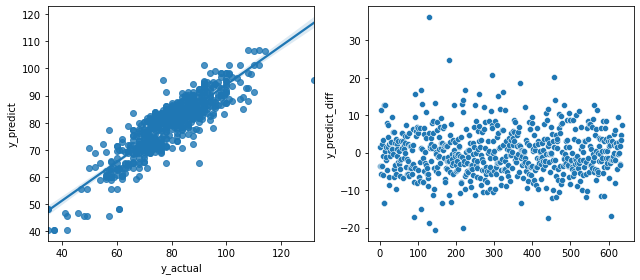

In [13]:
y_predict_diff = data_y.loc[:,config.Y_variable] - y_predict

model_result = pd.DataFrame({'y_predict_diff':y_predict_diff,
                             'y_actual':data_y.loc[:,config.Y_variable],
                             'y_predict':y_predict})
# display(Y_predict_diff)

# seaborn呈現結果
fig, axes = plt.subplots(1, 2, figsize=(9, 4))

# 預測值跟實際值分布狀況
sns.regplot(x = 'y_actual', 
            y = 'y_predict',
            data = model_result, 
            ax=axes[0])
    
    # 每筆資料的差異
sns.scatterplot(x = model_result.index,
                y = 'y_predict_diff',
                data = model_result, 
                ax=axes[1])
    
    
plt.tight_layout()